In [100]:
%matplotlib inline
import csv
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
import random

In [118]:
f = open('data/poisson1.csv', 'r')
f.readline()
data = np.loadtxt(f)

In [138]:
N = int(math.floor(len(data)/1))
pp = 100
pt = 1000

In [139]:
inx = np.zeros(pp)
for i in range(0,pp):
    inx[i] = i
    
PN  = np.zeros(pp)
for i in range(0,pp):
    PN[i] = pt * i

inxN = np.zeros(N);
for i in range(0,N):
    inxN[i] = i

PNN  = np.zeros(N);
for i in range(0,N):
    PNN[i] = pt * i; 

arrCount = np.zeros(pp)
j = 0
for i in range(0,pp):
    while(data[j] < PN[i]):
        arrCount[i] =  arrCount[i] + 1
        j = j + 1

interArr = np.zeros(N)
for i in range(0,N-1):
    interArr[i] = data[i+1] - data[i]

Xshifted = np.zeros((N,pp),int)
for i in range(0,N):
    for j in range(0,pp):
        if (i+j)-1 < N:
            Xshifted[i][j] = data[(i+j)-1]

interArrShifted = np.zeros((N,pp),int)
for i in range(0,N):
    for j in range(0,pp):
        if (i+j)-1 < N:
            interArrShifted[i][j] = interArr[(i+j)-1]

arrAvg = np.zeros(pp)
j = 1
for i in range(0,pp):  
    while(data[j] < PN[i]):
        arrAvg[i] =  arrAvg[i] + data[i]
        j = j + 1
    arrAvg[i] = arrAvg[i] / i
    
interArrAvg = np.zeros(pp)
j = 0
for i in range(0,pp):
    while(data[j] < PN[i]):
        interArrAvg[i] =  interArrAvg[i] + interArr[i]
        j = j + 1
    interArrAvg[i] = interArrAvg[i] / i

/Users/air/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars
/Users/air/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in double_scalars


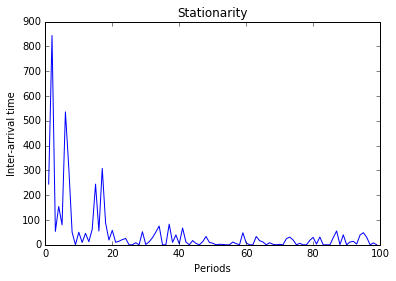

In [140]:
#Stationarity

inxN = np.zeros(N);
for i in range(1,N):
    inxN[i] = i;

plt.ylabel('Inter-arrival time')
plt.xlabel('Periods')
plt.title('Stationarity')

plt.plot(inx,interArrAvg)
plt.savefig("Stationarity.png")

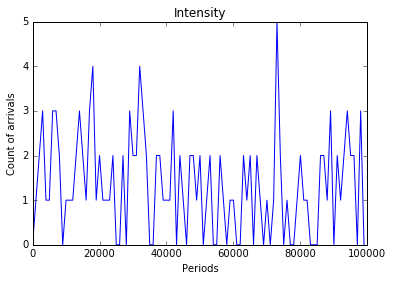

In [141]:
# INTENSITY

plt.plot(PN,arrCount)
plt.ylabel('Count of arrivals')
plt.xlabel('Periods')
plt.title('Intensity')
plt.savefig("INTENSITY.png")

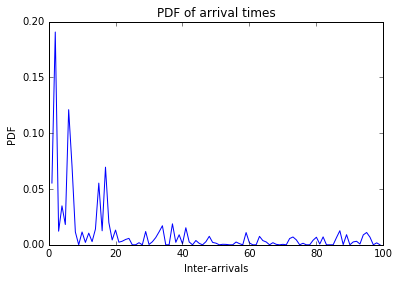

In [142]:
#PDF
countT = np.sum(interArrAvg[1:])
pdfArr = np.zeros(pp)
for i in range(0,pp):
    pdfArr[i] = interArrAvg[i]/countT

plt.ylabel('PDF')
plt.xlabel('Inter-arrivals')
plt.title('PDF of arrival times')   
plt.plot(pdfArr)
plt.savefig("PDF.png")

/Users/air/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


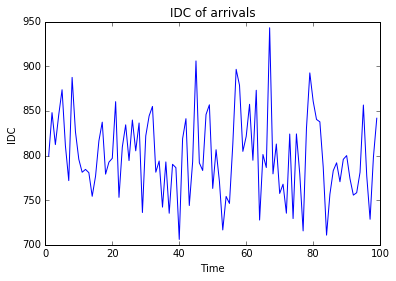

In [143]:
#IDC

IDC = np.zeros(pp);
l = math.floor(len(interArr)/pp);
for i in range(0,pp):
    IDC[i]  = np.var(interArr[((i-1) * l +1) : (i*l)]) / np.mean(interArr[((i-1) * l +1) : (i*l)] * 1)
plt.xlabel('Time');
plt.ylabel('IDC');
plt.title('IDC of arrivals');
plt.plot(IDC)
plt.savefig("IDC.png")


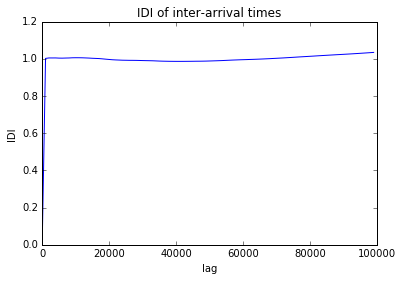

In [144]:
#IDI

E = np.mean(interArr)
IDI = np.zeros(pp)
for i in range(1,pp):
    IDI[i] = np.var(np.transpose(sum(np.transpose(interArrShifted[:,0:i])))) /(i * E * E)
plt.plot(PN,IDI)
plt.xlabel('lag')
plt.ylabel('IDI')
plt.title('IDI of inter-arrival times')
plt.savefig("IDI.png")

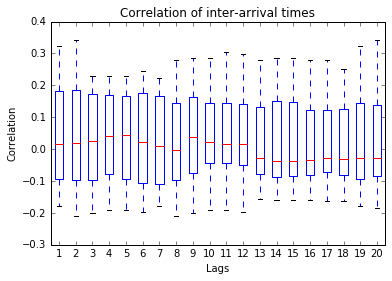

In [145]:
# Correlation
ccorrInt = np.ma.corrcoef(interArrShifted[0:20])
plt.figure()
plt.boxplot(ccorrInt, 0, '')
plt.xlabel('Lags');
plt.ylabel('Correlation');
plt.title('Correlation of inter-arrival times');
plt.savefig("Correlation.png")

In [146]:
print(interArrShifted[:,0:5])

[[  0 338 245 844  54]
 [338 245 844  54 618]
 [245 844  54 618 402]
 ..., 
 [375 445 803   0   0]
 [445 803   0   0   0]
 [803   0   0   0   0]]


In [117]:
np.savetxt('xx.txt', interArrShifted[:,0:5])